In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
path="C:\\Users\\basir\\OneDrive\\Desktop\\Traffic Sign Board Identification and voice vigilance system\\myData"
labelFile="C:\\Users\\basir\\OneDrive\\Desktop\\Traffic Sign Board Identification and voice vigilance system\\Untitled Folder 7\\labels.csv"
batch_size_val=50
steps_per_epoch_val=502
epochs_val=10
imageDimensions=(32,32,3)
testRatio=0.1
validationRatio=0.2

In [3]:
count=0
images=[]
classNo=[]
myList=os.listdir(path)
print("Total Classes Detected:",+len(myList))
noOfClasses=len(myList)
print("Importing Classes......")
for x in range(0,len(myList)):
    myPicList=os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg=cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count,end=" ")
    count+=1
print(" ")
images=np.array(images)
classNo=np.array(classNo)

Total Classes Detected: 43
Importing Classes......
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [4]:
X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validationRatio)

#X_train= ARRAY OF IMAGES TO TRAIN
#y_train= CORRESPONDING CLASS ID


In [19]:
print("Data Shapes")
print("Train",end="")
print(X_train.shape,y_train.shape)
print("validation",end="")
print(X_validation.shape,y_validation.shape)
print("Test",end="")
print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]),"The number of images in not equal to the number of labels in training set"
assert(X_validation.shape[0]==y_validation.shape[0]),"The number of images in not equal to the number of labels in validation set"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images in not equal to the number of labels in testing set"
assert(X_train.shape[1:]==(imageDimensions)),"The dimensions of the Training images are wrong"
assert(X_validation.shape[1:]==(imageDimensions)),"The dimensions of the Validation images are wrong"
assert(X_test.shape[1:]==(imageDimensions)),"The dimensions of the Test images are wrong"

Data Shapes
Train(25055, 32, 32, 3) (25055,)
validation(6264, 32, 32, 3) (6264,)
Test(3480, 32, 32, 3) (3480,)


In [20]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))


data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


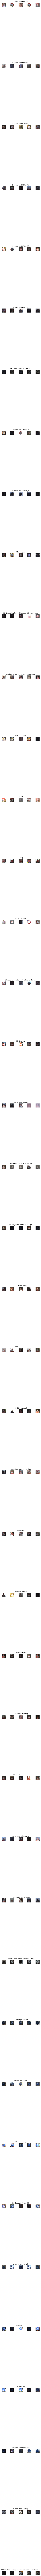

In [21]:
num_of_samples=[]
cols=5
num_classes=noOfClasses
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1), :, :],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row["Name"])
            num_of_samples.append(len(x_selected))


[133, 1442, 1431, 933, 1299, 1197, 271, 938, 908, 932, 1295, 867, 1380, 1345, 483, 388, 260, 717, 738, 139, 208, 194, 233, 331, 184, 977, 399, 155, 327, 174, 270, 492, 150, 438, 245, 768, 237, 129, 1326, 202, 217, 156, 147]


<function matplotlib.pyplot.show(close=None, block=None)>

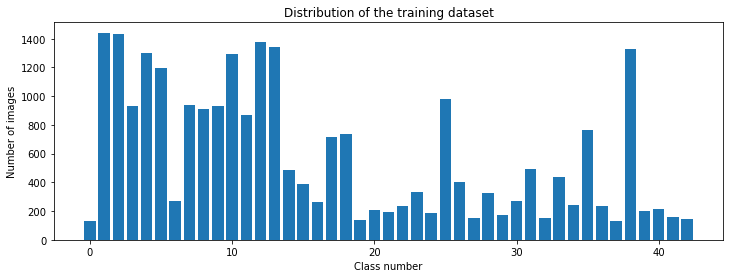

In [22]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show


In [23]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/225
    return img
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
#cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)])


In [24]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)


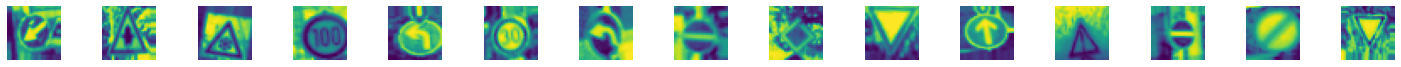

In [25]:
dataGen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)
dataGen.fit(X_train)
batches=dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)

#To show augmented image samples
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis('off')
plt.show()

y_train=to_categorical(y_train,noOfClasses)
y_validation=to_categorical(y_validation,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)


In [26]:
def myModel():
    no_of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_of_Nodes=500
    model=Sequential()
    model.add((Conv2D(no_of_Filters,size_of_Filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(no_of_Filters,size_of_Filter,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    
    model.add((Conv2D(no_of_Filters//2,size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_of_Filters//2,size_of_Filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [27]:
model=myModel()
print(model.summary())

my_callbacks =[
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=dataGen.flow(X_train,y_train,batch_size=batch_size_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

C:\Users\Rajesh\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/10
502/502 [==============================] - 126s 250ms/step - loss: 2.4841 - accuracy: 0.3007 - val_loss: 1.1743 - val_accuracy: 0.6808
Epoch 2/10
502/502 [==============================] - 131s 262ms/step - loss: 1.1203 - accuracy: 0.6536 - val_loss: 0.5488 - val_accuracy: 0.8457
Epoch 3/10
502/502 [==============================] - 131s 261ms/step - loss: 0.7204 - accuracy: 0.7746 - val_loss: 0.3814 - val_accuracy: 0.8893
Epoch 4/10
502/502 [==============================] - 132s 264ms/step - loss: 0.5456 - accuracy: 0.8297 - val_loss: 0.2638 - val_accuracy: 0.9227
Epoch 5/10
502/502 [==============================] - 132s 262ms/step - loss: 0.4505 - accuracy: 0.8566 - val_loss: 0.2441 - val_accuracy: 0.9331
Epoch 6/10
502/502 [==============================] - 131s 262ms/step - loss: 0.3879 - accuracy: 0.8791 - val_loss: 0.1478 - val_accuracy: 0.9572
Epoch 7/10
502/502 [==============================] - 132s 263ms/step - loss: 0.3361 - accuracy: 0.8959 - val_loss: 0.1

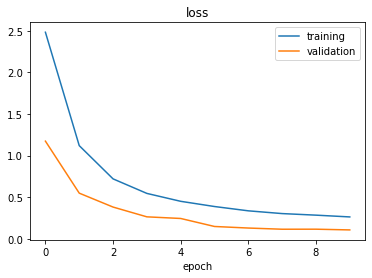

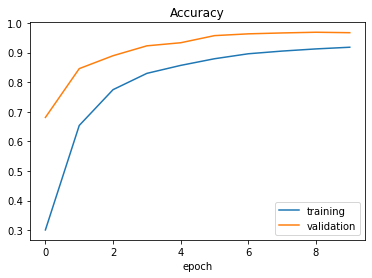

Test Score: 0.048426978290081024
Test Accuracy: 0.9844827651977539


In [28]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
score=model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])


In [29]:
model.save("my_model")
model.save_weights("weights.h5")


INFO:tensorflow:Assets written to: my_model\assets
